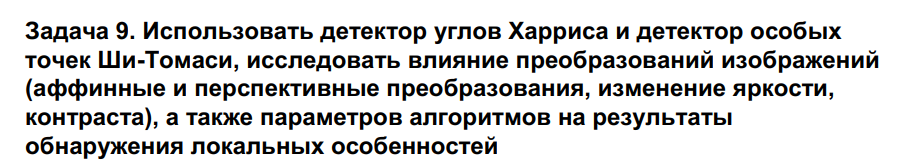

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


def harris(img):
    gray = cv.cvtColor(img.copy(), cv.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv.cornerHarris(gray,4,3,0.04)
    dst = cv.dilate(dst,None)
    thresh = 0.01 * dst.max()
    img_copy = img.copy()
    img_copy[dst>thresh]=[255,0,0]
    return img_copy


def st(img):    
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    corners = cv.goodFeaturesToTrack(gray,81,0.01,10)
    corners = np.intp(corners)
    img_copy = img.copy()
    for i in corners:
        x,y = i.ravel()
        cv.circle(img_copy,(x,y),3,255,-1)    
    return img_copy

In [2]:
def affine(img, angle, scale):
    center = (img.shape[1]//2, img.shape[0]//2)
    rot_mat = cv.getRotationMatrix2D(center, angle, scale)
    return cv.warpAffine(img.copy(), rot_mat, (img.shape[1], img.shape[0]))

In [3]:
def show_images(f_img, s_img, f_title, s_title):
    plt.figure(figsize=(12, 8))
    plt.subplot(121),plt.imshow(f_img), plt.title(f_title), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(s_img), plt.title(s_title), plt.xticks([]), plt.yticks([])
    plt.show()

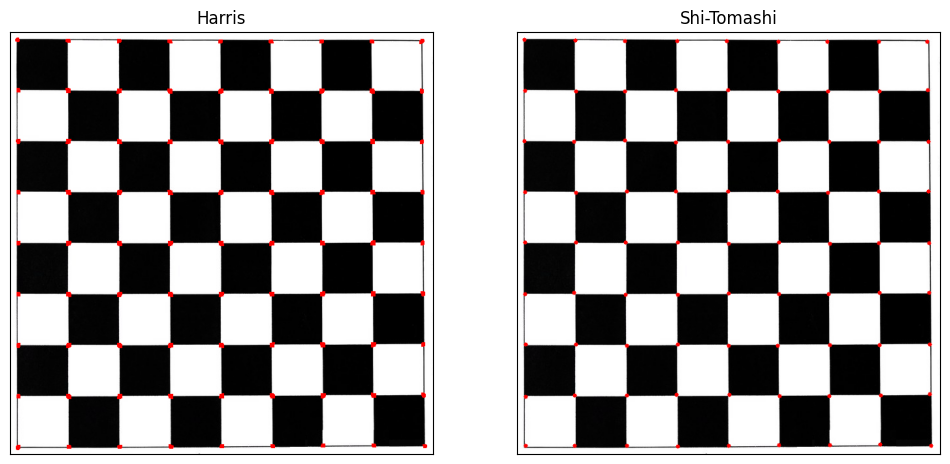

In [4]:
img = cv.imread("chess.png")
assert img is not None, "file could not be read"


rimg = affine(img, 60, 0.6)

input_pts = np.float32([[70, 70], [200, 70], [70, 200], [200, 200]])
output_pts = np.float32([[0, 0], [0, img.shape[0] - 100], [img.shape[1] - 100, img.shape[0] - 100], [img.shape[1] - 100, 0]])
M = cv.getPerspectiveTransform(input_pts,output_pts)
pimg = cv.warpPerspective(img, M, (img.shape[1], img.shape[0]), flags=cv.INTER_LINEAR)

himg = harris(img)
stimg = st(img)
rhimg = harris(rimg)
rstimg = st(rimg)
phimg = harris(pimg)
pstimg = st(pimg)


show_images(himg, stimg, 'Harris', 'Shi-Tomashi')

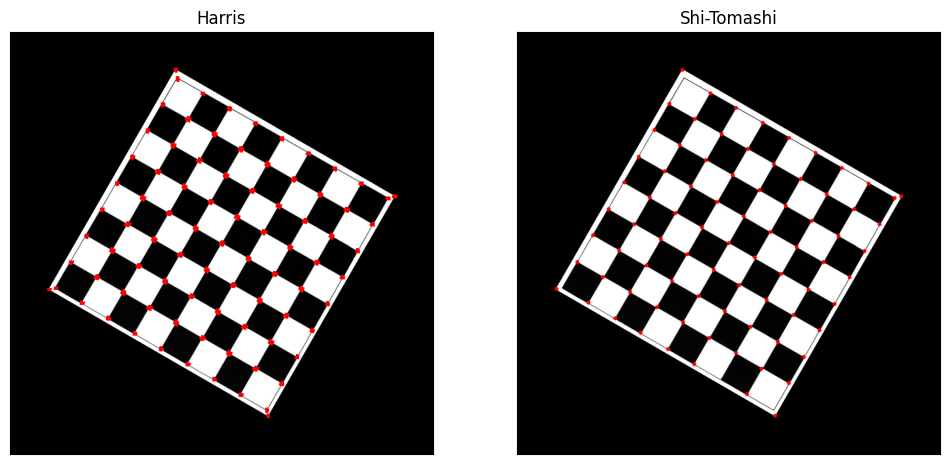

In [5]:
show_images(rhimg, rstimg, 'Harris', 'Shi-Tomashi')

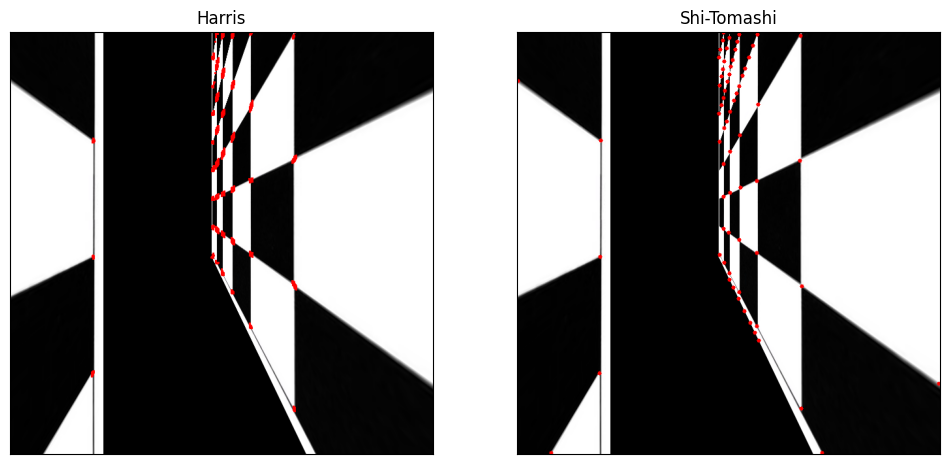

In [6]:
show_images(phimg, pstimg, 'Harris', 'Shi-Tomashi')

## Interactive

In [7]:
import ipywidgets as widgets

img = cv.imread("chess.png")
assert img is not None, "file could not be read"

@widgets.interact_manual(
    angle=(0, 360), scale=(0.01, 1., 0.01))
def affine(angle=60, scale=0.6):
    center = (img.shape[1]//2, img.shape[0]//2)
    rot_mat = cv.getRotationMatrix2D(center, angle, scale)
    rot_img = cv.warpAffine(img.copy(), rot_mat, (img.shape[1], img.shape[0]))
    gray = cv.cvtColor(rot_img.copy(), cv.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    #harris
    dst = cv.cornerHarris(gray,4,3,0.04)
    dst = cv.dilate(dst,None)
    thresh = 0.01 * dst.max()
    harris_img_copy = rot_img.copy()
    harris_img_copy[dst>thresh]=[255,0,0]
    #shi-tomashi
    corners = cv.goodFeaturesToTrack(gray,81,0.01,10)
    corners = np.intp(corners)
    st_img_copy = rot_img.copy()
    for i in corners:
        x,y = i.ravel()
        cv.circle(st_img_copy,(x,y),3,255,-1) 
    #plot images
    plt.figure(figsize=(12, 8))
    plt.subplot(121),plt.imshow(harris_img_copy), plt.title('Harris'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(st_img_copy), plt.title('Shi-Tomashi'), plt.xticks([]), plt.yticks([])
    plt.show()

interactive(children=(IntSlider(value=60, description='angle', max=360), FloatSlider(value=0.6, description='s…

In [8]:
img = cv.imread("chess.png")
assert img is not None, "file could not be read"

@widgets.interact_manual(
    x1=(0, 255), y1=(0, 255),
    dx1=(0, 255), dy1=(0, 255),
    x2=(0, 255), y2=(0, 255),
    dx2=(0, 255), dy2=(0, 255),
    x3=(0, 255), y3=(0, 255),
    dx3=(0, 255), dy3=(0, 255),
    x4=(0, 255), y4=(0, 255),
    dx4=(0, 255), dy4=(0, 255),)
def perspective(x1=70, y1=70, x2=200, y2=70, x3=70, y3=200, x4=200, y4=200,
               dx1=0, dy1=0, dx2=0, dy2=100, dx3=100, dy3=100, dx4=100, dy4=0):
    input_pts = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    output_pts = np.float32([[dx1, dy1], [dx2, img.shape[0] - dy2], 
                             [img.shape[1] - dx3, img.shape[0] - dy3], [img.shape[1] - dx4, dy4]])
    M = cv.getPerspectiveTransform(input_pts,output_pts)
    pimg = cv.warpPerspective(img, M, (img.shape[1], img.shape[0]), flags=cv.INTER_LINEAR)    
    gray = cv.cvtColor(pimg.copy(), cv.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    #harris
    dst = cv.cornerHarris(gray,4,3,0.04)
    dst = cv.dilate(dst,None)
    thresh = 0.01 * dst.max()
    harris_img_copy = pimg.copy()
    harris_img_copy[dst>thresh]=[255,0,0]
    #shi-tomashi
    corners = cv.goodFeaturesToTrack(gray,81,0.01,10)
    corners = np.intp(corners)
    st_img_copy = pimg.copy()
    for i in corners:
        x,y = i.ravel()
        cv.circle(st_img_copy,(x,y),3,255,-1) 
    #plot images
    plt.figure(figsize=(12, 8))
    plt.subplot(121),plt.imshow(harris_img_copy), plt.title('Harris'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(st_img_copy), plt.title('Shi-Tomashi'), plt.xticks([]), plt.yticks([])
    plt.show()

interactive(children=(IntSlider(value=70, description='x1', max=255), IntSlider(value=70, description='y1', ma…